In [1]:
#1. DATA CLEANSING
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from matplotlib import pyplot as plt

In [2]:
#import warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
#Melihat isi database olist
conn = sqlite3.connect('olist.db')
list_table = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(list_table)

                                name
0       olist_order_customer_dataset
1                olist_order_dataset
2        olist_order_reviews_dataset
3       olist_order_payments_dataset
4          olist_order_items_dataset
5             olist_products_dataset
6              olist_sellers_dataset
7          olist_geolocation_dataset
8  product_category_name_translation


In [4]:
#Membaca dan mengambil data dari database
conn = sqlite3.connect('olist.db')
query1 = 'SELECT * FROM olist_order_customer_dataset' 
customers = pd.read_sql(query1, conn)

query2 = 'SELECT * FROM olist_order_dataset' 
orders = pd.read_sql(query2, conn)

query3 = 'SELECT * FROM olist_order_items_dataset' 
order_items = pd.read_sql(query3, conn)

query4 = 'SELECT * FROM olist_order_payments_dataset' 
payments = pd.read_sql(query4, conn)

query5 = 'SELECT * FROM olist_products_dataset' 
products = pd.read_sql(query5, conn)

query6 = 'SELECT * FROM product_category_name_translation'
product_category_name_translation = pd.read_sql(query6, conn)

In [5]:
#cek tipe data kolom tabel orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          99441 non-null  int64 
 1   order_id                       99441 non-null  object
 2   customer_id                    99441 non-null  object
 3   order_status                   99441 non-null  object
 4   order_purchase_timestamp       99441 non-null  object
 5   order_approved_at              99281 non-null  object
 6   order_delivered_carrier_date   97658 non-null  object
 7   order_delivered_customer_date  96476 non-null  object
 8   order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.8+ MB


In [78]:
#parsing date
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_hour'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.strftime('%H')


In [7]:
#cek tipe data kolom tabel orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          99441 non-null  int64         
 1   order_id                       99441 non-null  object        
 2   customer_id                    99441 non-null  object        
 3   order_status                   99441 non-null  object        
 4   order_purchase_timestamp       99441 non-null  datetime64[ns]
 5   order_approved_at              99281 non-null  datetime64[ns]
 6   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 7   order_delivered_customer_date  96476 non-null  datetime64[ns]
 8   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(1), object(3)
memory usage: 6.8+ MB


In [8]:
# Identifikasi outlier melalui statistik deskriptif
order_items.describe()

,index,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000,112650.000000
mean,56324.500000,1.197834,120.653739,19.990320
std,32519.398249,0.705124,183.633928,15.806405
min,0.000000,1.000000,0.850000,0.000000
25%,28162.250000,1.000000,39.900000,13.080000
50%,56324.500000,1.000000,74.990000,16.260000
75%,84486.750000,1.000000,134.900000,21.150000
max,112649.000000,21.000000,6735.000000,409.680000


Text(0, 0.5, 'jumlah')

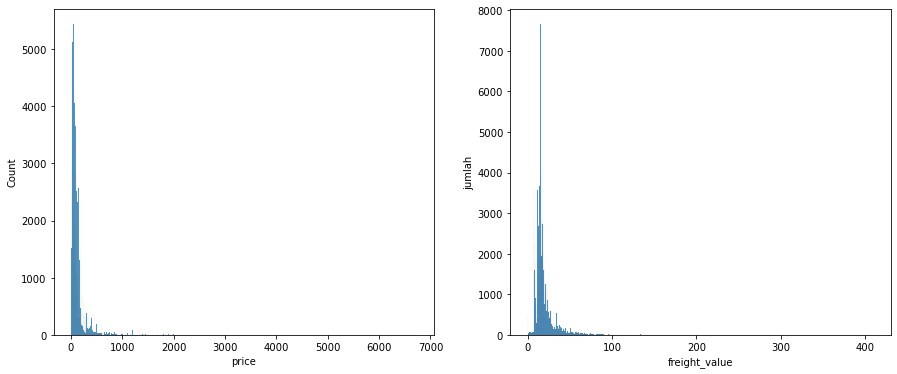

In [9]:
#identifikasi outlier pada kolom price dan freight_value

fig, ax = plt.subplots(ncols=2, nrows=1,figsize = (15,6))

sns.histplot(data=order_items, x='price', ax= ax[0])
plt.ylabel('jumlah')

sns.histplot(data=order_items, x='freight_value', ax= ax[1])
plt.ylabel('jumlah')

In [10]:
#handling outlier price

##Menghitung Q1 dan Q3 kolom price
Q1_price = order_items.price.quantile(0.25)
Q3_price = order_items.price.quantile(0.75)

##Menghitung batas bawah dan batas atas kolom price
batas_bawah_price = Q1_price - (Q3_price-Q1_price)*1.5
batas_atas_price = Q3_price + (Q3_price-Q1_price)*1.5

order_items_handling_outlier_price = order_items

##Menghitung Median dari kolom price
median_price = order_items['price'].median()

##melakukan imputasi data outlier dengan median
order_items_handling_outlier_price.loc[order_items_handling_outlier_price['price'] > batas_atas_price, 'price'] = median_price



#handling outlier freight_value

##Menghitung Q1 dan Q3 kolom freight_value
Q1_freight_value = order_items.freight_value.quantile(0.25)
Q3_freight_value = order_items.freight_value.quantile(0.75)

##Menghitung batas bawah dan batas atas kolom freight_value
batas_bawah_freight_value = Q1_freight_value - (Q3_freight_value-Q1_freight_value)*1.5
batas_atas_freight_value = Q3_freight_value + (Q3_freight_value-Q1_freight_value)*1.5

##Menghitung Median dari kolom freight_value
median_freight_value = order_items['freight_value'].median()

order_items_handling_outlier_price_n_freight_value = order_items_handling_outlier_price

##melakukan imputasi data outlier dengan median
order_items_handling_outlier_price_n_freight_value.loc[order_items_handling_outlier_price_n_freight_value['freight_value'] > batas_atas_freight_value, 'freight_value'] = median_freight_value

<AxesSubplot:xlabel='freight_value', ylabel='Count'>

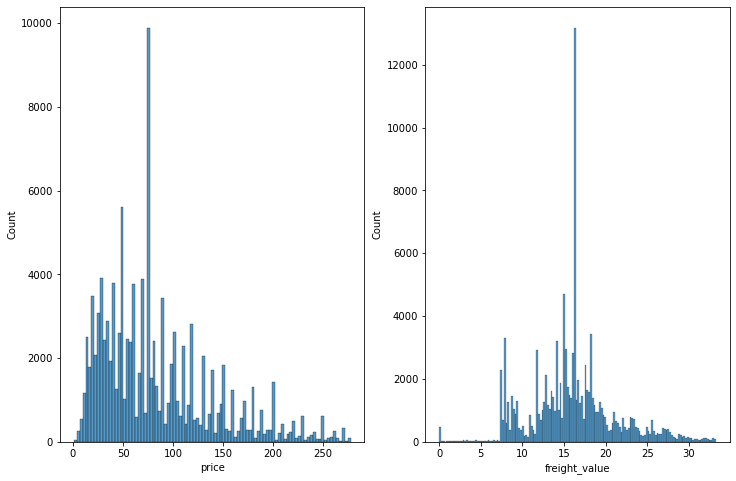

In [11]:
#menampilkan distribusi tabel order items setelah handle outlier
fig, ax = plt.subplots(ncols=2, nrows=1,figsize = (12,8))

sns.histplot(data=order_items_handling_outlier_price_n_freight_value, x='price', ax= ax[0])

sns.histplot(data=order_items_handling_outlier_price_n_freight_value, x='freight_value', ax= ax[1])

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

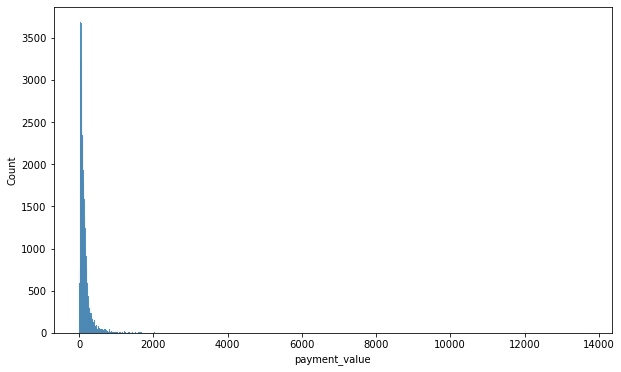

In [12]:
#identifikasi outlier kolom payment_value

fig, ax = plt.subplots(figsize= (10,6))

sns.histplot(data=payments, x='payment_value')

In [13]:
# perhitungan Q1 dan Q3 data payment_value
Q1_payment_value = payments.payment_value.quantile(0.25)
Q3_payment_value = payments.payment_value.quantile(0.75)


# perhitungan batas bawah dan batas atas
batas_bawah_payment_value = Q1_payment_value - (Q3_payment_value - Q1_payment_value)*1.5
batas_atas_payment_value = Q3_payment_value + (Q3_payment_value - Q1_payment_value)*1.5

#perhitungan median kolom payment_value
median_payment_value = payments['payment_value'].median()

#imputasi median ke data outlier
payment_handling_outlier = payments
payment_handling_outlier.loc[payment_handling_outlier['payment_value'] > batas_atas_payment_value, 'payment_value'] = median_payment_value

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

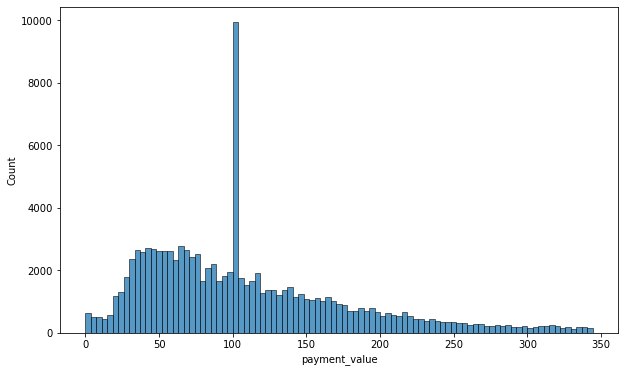

In [14]:
#menampilkan distribusi tabel payment setelah handle outlier
fig, ax = plt.subplots(figsize= (10,6))

sns.histplot(data=payment_handling_outlier, x='payment_value')

In [15]:
#identifikasi missing value
(products.isna().sum()/len(products)*100).sort_values(ascending=False)

product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
index                         0.000000
product_id                    0.000000
dtype: float64

In [16]:
#menampilkan tabel yang terdapat missing values
products_missing = products[products.isnull().any(axis=1)]
products_missing.head(10)

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,105,a41e356c76fab66334f36de622ecbd3a,None,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,128,d8dee61c2034d6d075997acef1870e9b,None,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,145,56139431d72cd51f19eb9f7dae4d1617,None,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,154,46b48281eb6d663ced748f324108c733,None,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,197,5fb61f482620cb672f5e586bb132eae9,None,NaN,NaN,NaN,300.0,35.0,7.0,12.0
244,244,e10758160da97891c2fdcbc35f0f031d,None,NaN,NaN,NaN,2200.0,16.0,2.0,11.0
294,294,39e3b9b12cd0bf8ee681bbc1c130feb5,None,NaN,NaN,NaN,300.0,16.0,7.0,11.0
299,299,794de06c32a626a5692ff50e4985d36f,None,NaN,NaN,NaN,300.0,18.0,8.0,14.0
347,347,7af3e2da474486a3519b0cba9dea8ad9,None,NaN,NaN,NaN,200.0,22.0,14.0,14.0
428,428,629beb8e7317703dcc5f35b5463fd20e,None,NaN,NaN,NaN,1400.0,25.0,25.0,25.0


In [17]:
#drop data yang terdapat missing values
products_handle_missing_values = products.dropna()

In [18]:
#identifikasi missing value
(products_handle_missing_values.isna().sum()/len(products)*100).sort_values(ascending=False)

index                         0.0
product_id                    0.0
product_category_name         0.0
product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_length_cm             0.0
product_height_cm             0.0
product_width_cm              0.0
dtype: float64

In [26]:
#2. DATA ANALISIS
#a.Produk Yang Paling banyak diminati

#Menggabungkan kolom orders, payments dan order items
merge_order_orderItems = pd.merge(orders,order_items, on= 'order_id')
merge_order_orderItems_payments = pd.merge(merge_order_orderItems, payments, on= 'order_id')

#memilih kolom kolom yang ditampilkan
merge_order_orderItems_payments = merge_order_orderItems_payments[['order_id','order_status','order_purchase_timestamp','price','freight_value','payment_type','payment_value']]
merge_order_orderItems_payments.head(5)

#menggabungkan kolom orders, order_items, products dan product category name translation
merge_order_orderItems_products = pd.merge(merge_order_orderItems,products, on= 'product_id')
merge_order_orderItems_products_productCategory = pd.merge(merge_order_orderItems_products, product_category_name_translation, on= 'product_category_name', suffixes=('_order_items', '_product_category' ))

#menampilkan kolom yang dipilih
merge_order_orderItems_products_productCategory = merge_order_orderItems_products_productCategory[['order_id','price','product_category_name_english']]
merge_order_orderItems_products_productCategory

,order_id,price,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,29.99,housewares
1,128e10d95713541c87cd1a2e48201934,29.99,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,29.99,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,29.99,housewares
4,6ea2f835b4556291ffdc53fa0b3b95e8,74.99,housewares
...,...,...,...
111018,0b82d0616f1ad8da15cf967b984b4004,25.00,arts_and_craftmanship
111019,2ef4a11b6e24fdfbb43b92cb5f95edff,19.00,arts_and_craftmanship
111020,2ef4a11b6e24fdfbb43b92cb5f95edff,39.90,arts_and_craftmanship
111021,2c4ada2e75c2ad41dd93cebb5df5f023,183.29,security_and_services


In [27]:
# membuat grouping total penjualan berdasarkan kategori
grouping_penjualan_berdasarkan_kategori = merge_order_orderItems_products_productCategory.groupby('product_category_name_english').agg({'price':'sum'}).reset_index()
top5_penjualan_berdasarkan_kategori = grouping_penjualan_berdasarkan_kategori.nlargest(5,'price')
top5_penjualan_berdasarkan_kategori

,product_category_name_english,price
7,bed_bath_table,959253.57
43,health_beauty,764398.15
65,sports_leisure,753610.55
15,computers_accessories,704334.03
70,watches_gifts,657062.78


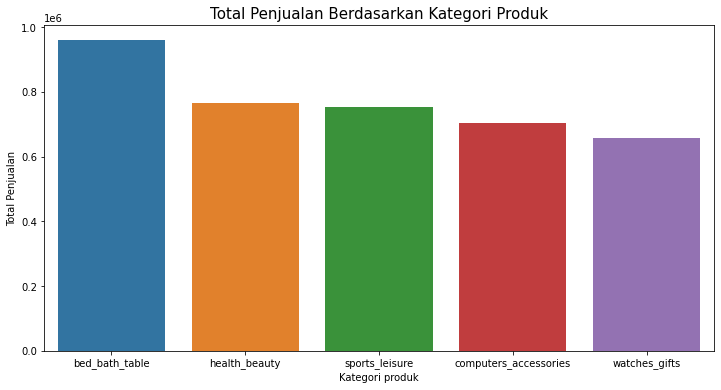

In [28]:
# membuat visualisasi

## membuat figure
plt.figure(figsize=(12, 6))

## membuat plot
sns.barplot(data=top5_penjualan_berdasarkan_kategori, x='product_category_name_english', y='price')

## membuat nama judul plot
plt.title('Total Penjualan Berdasarkan Kategori Produk', fontsize= 15)

## membuat nama label x
plt.xlabel('Kategori produk')

## membuat nama label y
plt.ylabel('Total Penjualan')

## menampilkan plot
plt.show()



In [29]:
#b.Trend Penjualan dari bulan ke bulan

#menambahkan kolom month
merge_order_orderItems_payments['month'] = merge_order_orderItems_payments['order_purchase_timestamp'].dt.to_period('M')

#grouping
total_penjualan = merge_order_orderItems_payments.groupby('month')['payment_value'].sum()
df_total_penjualan = total_penjualan.reset_index()
df_total_penjualan.columns = ['Bulan', 'Total_Penjualan']
df_total_penjualan['Bulan'] = df_total_penjualan['Bulan'].dt.to_timestamp()
df_total_penjualan

,Bulan,Total_Penjualan
0,2016-09-01,347.52
1,2016-10-01,44476.85
2,2016-12-01,19.62
3,2017-01-01,111026.96
4,2017-02-01,228041.56
5,2017-03-01,351646.98
6,2017-04-01,320413.20
7,2017-05-01,483650.37
8,2017-06-01,405163.14
9,2017-07-01,529416.56


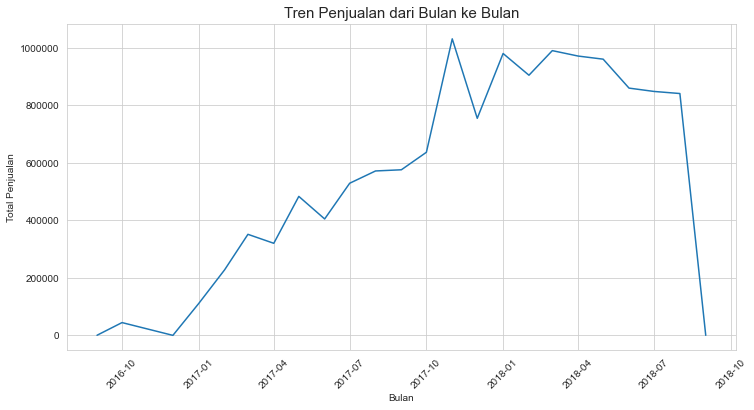

In [30]:
# visualisasi

## membuat grid
sns.set_style("whitegrid")

## membuat figure
plt.figure(figsize=(12, 6))

## membuat plot
sns.lineplot(data=df_total_penjualan, x='Bulan', y='Total_Penjualan')

## memberi judul plot
plt.title('Tren Penjualan dari Bulan ke Bulan', fontsize= 15)

## memberi nama label x
plt.xlabel('Bulan')

## memberi nama label y
plt.ylabel('Total Penjualan')

## menampilkan kolom y dengan angka real
plt.ticklabel_format(style='plain', axis='y')

## memiringkan label x
plt.xticks(rotation=45)

## menampilkan shop
plt.show()

In [32]:
#c.5 Kota dengan pemesanan terbanyak
#menggabungkan tabel customers dan orders
merged_customers_orders = pd.merge(orders, customers, on='customer_id')

In [33]:
#membuat tabel 5 kota dengan pemesanan terbanyak
top5_largest_orders = merged_customers_orders.groupby('customer_city').agg({'order_id': 'count'}).nlargest(5, 'order_id').reset_index()
top5_largest_orders

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


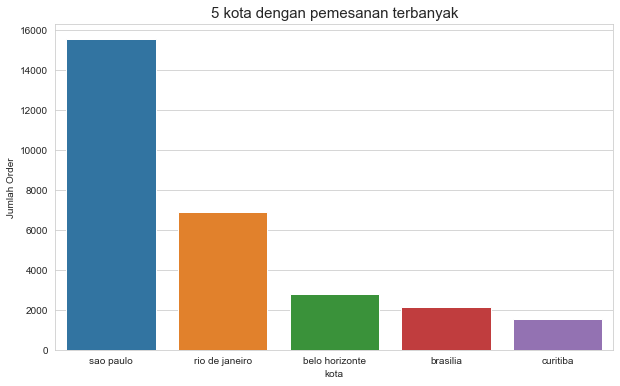

In [34]:
#membuat visualisasi 

## membuat figure
fig, ax = plt.subplots(figsize = (10,6))

## membuat plot
sns.barplot(data=top5_largest_orders, x='customer_city', y='order_id')

## membuat nama judul plot
plt.title('5 kota dengan pemesanan terbanyak', fontsize= 15)

## membuat nama label x
plt.xlabel('kota')

## membuat nama label y
plt.ylabel('Jumlah Order')

## menampilkan plot
plt.show()

In [36]:
#d.Metode Pembayaran yang paling banyak digunakan
# grouping tabel payments
total_penjualan_berdasarkan_metode_pembayaran = payments.groupby('payment_type').agg({'order_id':'count'}).reset_index().sort_values(by= 'order_id', ascending=False)
total_penjualan_berdasarkan_metode_pembayaran

,payment_type,order_id
1,credit_card,76795
0,boleto,19784
4,voucher,5775
2,debit_card,1529
3,not_defined,3


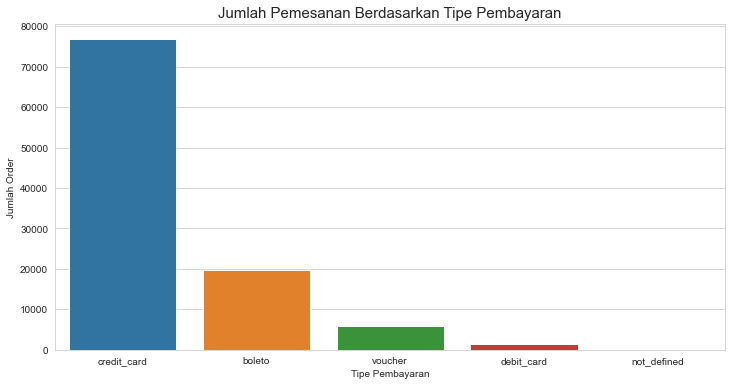

In [37]:
# membuat visualisasi

## membuat figure
plt.figure(figsize=(12, 6))

## membuat plot
sns.barplot(data=total_penjualan_berdasarkan_metode_pembayaran, x='payment_type', y='order_id')

## membuat nama judul plot
plt.title('Jumlah Pemesanan Berdasarkan Tipe Pembayaran', fontsize= 15)

## membuat nama label x
plt.xlabel('Tipe Pembayaran')

## membuat nama label y
plt.ylabel('Jumlah Order')

## menampilkan plot
plt.show()

In [59]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    plt.show()
    
def bar_plot(x, y, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.barplot(x = x, y=y, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    plt.show()

In [58]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [79]:
orders['order_purchase_hour'].value_counts()

16    6675
11    6578
14    6569
13    6518
15    6454
21    6217
20    6193
10    6177
17    6150
12    5995
19    5982
22    5816
18    5769
09    4785
23    4123
08    2967
00    2394
07    1231
01    1170
02     510
06     502
03     272
04     206
05     188
Name: order_purchase_hour, dtype: int64

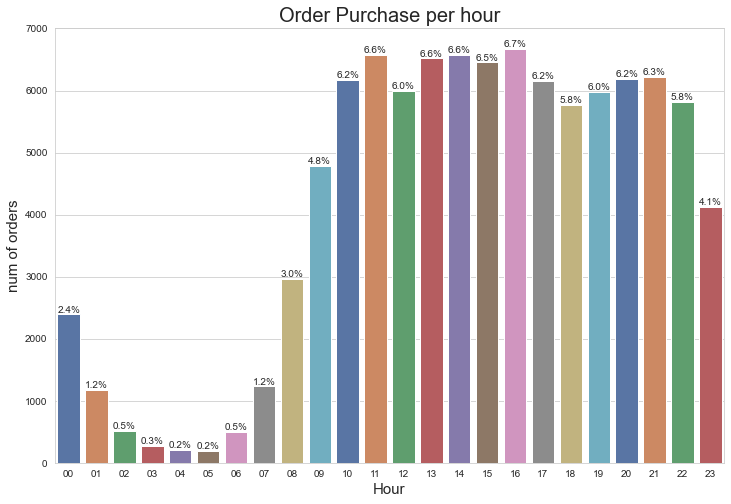

In [83]:
x = orders['order_purchase_hour']
order = [str(i).zfill(2) for i in range(24)]
count_plot(x, orders, 'Order Purchase per hour', 'Hour', 'num of orders', 12, 8, order=order, palette='deep')

In [84]:
time_of_day = []
for time in orders['order_purchase_hour']:
    
    try:
        time = int(time)
        if time >= 6 and time < 12:
            time_of_day.append('Morning')
        elif time >= 12 and time < 17:
            time_of_day.append('Afternoon')
        elif time >= 17 and time <= 20:
            time_of_day.append('Evening')
        else:
            time_of_day.append('Night')
            
    except:
        time_of_day.append('Unknown')

In [88]:
orders['classification_time_purchase'] = time_of_day

In [86]:
orders['classification_time_purchase'].value_counts()

Afternoon    32211
Evening      24094
Morning      22240
Night        20896
Name: classification_time_purchase, dtype: int64

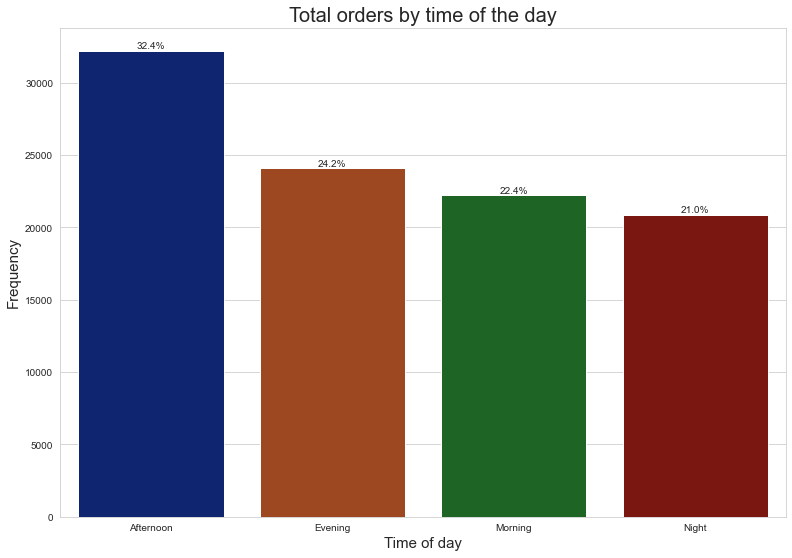

In [87]:
x = orders['classification_time_purchase']
order = x.value_counts().index
count_plot(x, orders,'Total orders by time of the day', 'Time of day' , 'Frequency', 13,9, order=order, palette='dark')